In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd_influence = pd.read_csv('influence_data.csv',encoding = 'utf8')

In [3]:
pd_influence.head()

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990


In [6]:
d = pd_influence.groupby(by = ['influencer_id','influencer_main_genre'])['follower_id'].sum()

In [8]:
d

influencer_id  influencer_main_genre
335            Pop/Rock                 16968444
441            Pop/Rock                   404206
1097           Latin                      166033
1098           Pop/Rock                 18801516
1113           Pop/Rock                   529050
                                          ...   
3099573        Religious                  275757
3161008        R&B;                      3306945
3214680        Avant-Garde               2517606
3413511        R&B;                      2619843
3495279        Pop/Rock                    36106
Name: follower_id, Length: 3774, dtype: int64

In [ ]:
#pd.Series(df['Value'].values, index=df['Date'])

In [60]:
a = pd.Series({'a':list(d.index)})

In [61]:
a

a    [(335, Pop/Rock), (441, Pop/Rock), (1097, Lati...
dtype: object

In [64]:
list(d.index)

[(335, 'Pop/Rock'),
 (441, 'Pop/Rock'),
 (1097, 'Latin'),
 (1098, 'Pop/Rock'),
 (1113, 'Pop/Rock'),
 (1163, 'Jazz'),
 (1190, 'R&B;'),
 (1266, 'International'),
 (1433, 'Country'),
 (1498, 'Pop/Rock'),
 (1611, 'Electronic'),
 (2130, 'Stage & Screen'),
 (2252, 'Pop/Rock'),
 (2273, 'Comedy/Spoken'),
 (2330, 'Easy Listening'),
 (2411, 'Electronic'),
 (3056, 'R&B;'),
 (3170, 'Pop/Rock'),
 (3413, 'Vocal'),
 (3426, 'R&B;'),
 (3595, 'Stage & Screen'),
 (3627, 'Reggae'),
 (3669, 'Pop/Rock'),
 (3829, 'Blues'),
 (4451, 'Pop/Rock'),
 (4852, 'Latin'),
 (5307, 'R&B;'),
 (5366, 'Latin'),
 (5441, 'Pop/Rock'),
 (5501, 'Pop/Rock'),
 (5882, 'Pop/Rock'),
 (5953, 'Pop/Rock'),
 (5980, 'Vocal'),
 (6143, 'Jazz'),
 (6232, 'Electronic'),
 (6310, 'Pop/Rock'),
 (6320, 'Pop/Rock'),
 (6334, 'Vocal'),
 (6563, 'Jazz'),
 (6613, 'International'),
 (6855, 'Latin'),
 (7230, 'Pop/Rock'),
 (7305, 'Pop/Rock'),
 (7448, 'R&B;'),
 (7689, 'R&B;'),
 (7729, 'Pop/Rock'),
 (7731, 'Pop/Rock'),
 (7920, 'Pop/Rock'),
 (8125, 'R&B;'),
 

In [65]:
e = pd_influence.groupby(by = ['follower_id','follower_main_genre'])['follower_id'].sum()

In [73]:
f = set(list(d.index))|set(list(e.index))

In [78]:
df1 = pd.DataFrame({'id,genre':list(f)})

In [79]:
df1

,"id,genre"
0,"(225944, International)"
1,"(481057, Pop/Rock)"
2,"(640675, Jazz)"
3,"(1379627, Country)"
4,"(939871, Religious)"
...,...
5598,"(387352, Country)"
5599,"(757157, Pop/Rock)"
5600,"(932328, Pop/Rock)"
5601,"(820780, Comedy/Spoken)"


In [ ]:
pd_influence['forcount'] = np.zeros(pd_influence.shape[1])

In [ ]:
pd_influence.groupby(by = ['influencer_name'])

In [82]:
infl_num = pd_influence['influencer_name'].value_counts()

In [85]:
pd.DataFrame(infl_num).head(15)

,influencer_name
The Beatles,615
Bob Dylan,389
The Rolling Stones,319
David Bowie,238
Led Zeppelin,221
Jimi Hendrix,201
The Kinks,192
The Beach Boys,186
Hank Williams,184
The Velvet Underground,181


In [1]:
############################################第二天 下面完成第一题网络的构建############################################
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#导入influence数据集
df_infl = pd.read_csv('influence_data.csv',encoding = 'utf8')

In [3]:
df_infl.head()

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990


In [4]:
#删除艺术家名字的列，因为我们只用id来代表艺术家
df_infl = df_infl.drop(columns = ['influencer_name','follower_name'])

In [5]:
df_infl.head()

,influencer_id,influencer_main_genre,influencer_active_start,follower_id,follower_main_genre,follower_active_start
0,759491,Pop/Rock,1980,74,Pop/Rock,1980
1,25462,Electronic,1990,335,Pop/Rock,1990
2,66915,Pop/Rock,1960,335,Pop/Rock,1990
3,71209,Pop/Rock,1950,335,Pop/Rock,1990
4,91438,Pop/Rock,1980,335,Pop/Rock,1990


In [11]:
#按行遍历dataframe，之后构造图
i = 0
#for index, row in df_infl.iterrows():
#    print row["c1"], row["c2"]
for index,row in df_infl.iterrows():
    print(row['influencer_main_genre'])
    i = i+1
    if i == 3 :
        break

Pop/Rock
Electronic
Pop/Rock


In [6]:
#构造图：
DG = nx.DiGraph()

In [7]:
for index,row in df_infl.iterrows():
    #连出来有向边：
    DG.add_edges_from([(row['influencer_id'], row['follower_id'])])
    #为节点赋‘genre’属性
    DG.nodes[row['influencer_id']]['genre'] = row['influencer_main_genre']
    DG.nodes[row['follower_id']]['genre'] = row['follower_main_genre']
    #为节点赋‘active_start’属性
    DG.nodes[row['influencer_id']]['active_start'] = row['influencer_active_start']
    DG.nodes[row['follower_id']]['active_start'] = row['follower_active_start']

In [8]:
#检查边的条数，发现正好等于影响发生的次数，妥！
len(list(DG.edges))

42770

In [9]:
len(DG.nodes)

5603

In [10]:
DG.nodes[754032]['genre']

'Pop/Rock'

In [11]:
#为图的边赋值，假如是跨界影响，就为cross赋1，反之赋0
for index,row in df_infl.iterrows():
    if DG.nodes[row['influencer_id']]['genre'] == DG.nodes[row['follower_id']]['genre']:
        DG.edges[row['influencer_id'],row['follower_id']]['cross'] = 0
        break
    else:
        DG.edges[row['influencer_id'],row['follower_id']]['cross'] = 1

In [12]:
DG.edges[759491,74]

{'cross': 0}

In [61]:
one_order_infl = {}
#求出一阶邻居：
for node in DG.nodes:
    one_order_infl[node] = DG.out_degree(node)

In [62]:
#求出一阶邻居的个数dataframe：
one_order_infl = pd.DataFrame.from_dict(one_order_infl,orient='index')
one_order_infl.columns = ['one_order_infl']

In [63]:
one_order_infl.head()

,one_order_infl
759491,12
74,0
25462,12
335,22
66915,389


In [67]:
#按名次排个序
one_order_infl = one_order_infl.sort_values('one_order_infl',ascending = False)

In [68]:
one_order_infl.head()

,one_order_infl
754032,615
66915,389
894465,319
531986,238
139026,221


In [69]:
one_order_infl.to_csv('one_order_infl.csv')

In [82]:
#利用single_source_shortest_path_length 求走几步可以到达的人数
len(nx.single_source_shortest_path_length(DG, 531986 ,cutoff = 2))

1419

In [87]:
several_order_infl = {}
for node in DG.nodes:
    several_order_infl[node] = len(nx.single_source_shortest_path_length(DG, node ,cutoff = 2))

several_order_infl = pd.DataFrame.from_dict(several_order_infl,orient='index')
several_order_infl.columns = ['several_order_infl']

#按名次排个序
several_order_infl = several_order_infl.sort_values('several_order_infl',ascending = False)



In [ ]:
#def x_order_infl(x):

#    several_order_infl = {}
#    for node in DG.nodes:
#        several_order_infl[node] = len(nx.single_source_shortest_path_length(DG, node ,cutoff = x))
        
#    several_order_infl = pd.DataFrame.from_dict(several_order_infl,orient='index')
#    several_order_infl.columns = ['several_order_infl']

    #按名次排个序
#    several_order_infl = several_order_infl.sort_values('several_order_infl',ascending = False)

#    several_order_infl.plot(kind='bar')

In [89]:
#二阶以内的邻居结果：
several_order_infl.head()
several_order_infl.to_csv('two_order_infl.csv')

In [90]:
#三阶以内的邻居结果：
several_order_infl = {}
for node in DG.nodes:
    several_order_infl[node] = len(nx.single_source_shortest_path_length(DG, node ,cutoff = 3))

several_order_infl = pd.DataFrame.from_dict(several_order_infl,orient='index')
several_order_infl.columns = ['several_order_infl']

#按名次排个序
several_order_infl = several_order_infl.sort_values('several_order_infl',ascending = False)

several_order_infl.head()
several_order_infl.to_csv('three_order_infl.csv')

In [91]:
#所有阶以内的邻居结果：
several_order_infl = {}
for node in DG.nodes:
    several_order_infl[node] = len(nx.single_source_shortest_path_length(DG, node ,cutoff = None))

several_order_infl = pd.DataFrame.from_dict(several_order_infl,orient='index')
several_order_infl.columns = ['several_order_infl']

#按名次排个序
several_order_infl = several_order_infl.sort_values('several_order_infl',ascending = False)

several_order_infl.to_csv('all_order_infl.csv')

In [92]:
#1阶以内的邻居结果：
several_order_infl = {}
for node in DG.nodes:
    several_order_infl[node] = len(nx.single_source_shortest_path_length(DG, node ,cutoff = 1))

several_order_infl = pd.DataFrame.from_dict(several_order_infl,orient='index')
several_order_infl.columns = ['several_order_infl']

#按名次排个序
several_order_infl = several_order_infl.sort_values('several_order_infl',ascending = False)

In [94]:
#求出来中继者的角色充当数：
middle_infl = {}

#求出middle者的个数：
for node in DG.nodes:
    middle_infl[node] = DG.out_degree(node) * DG.in_degree(node)
    
#求出middle者的个数dataframe：
middle_infl = pd.DataFrame.from_dict(middle_infl,orient='index')
middle_infl.columns = ['middle_infl']

#按名次排个序
middle_infl = middle_infl.sort_values('middle_infl',ascending = False)
middle_infl.to_csv('middle_infl.csv')

In [96]:
#################################提取Pop/rock的影响子图#############################
#构造图：
DG_pop_rock = nx.DiGraph()
for index,row in df_infl.iterrows():
    if (row['influencer_main_genre'] == 'Pop/Rock') & (row['follower_main_genre'] == 'Pop/Rock') :
        
    #连出来有向边：
        DG_pop_rock.add_edges_from([(row['influencer_id'], row['follower_id'])])
    
    #已经是流派的子图了，就不用加上属性的帽子了
    #为节点赋‘genre’属性
    #DG.nodes[row['influencer_id']]['genre'] = row['influencer_main_genre']
    #DG.nodes[row['follower_id']]['genre'] = row['follower_main_genre']
    
    #为节点赋‘active_start’属性
        DG_pop_rock.nodes[row['influencer_id']]['active_start'] = row['influencer_active_start']
        DG_pop_rock.nodes[row['follower_id']]['active_start'] = row['follower_active_start']

In [98]:
len(DG_pop_rock.nodes)

2723

In [99]:
#对pop_rock，subgragh进行同样分析
pop_rock_one_order_infl = {}
#求出一阶邻居：
for node in DG_pop_rock.nodes:
    pop_rock_one_order_infl[node] = DG_pop_rock.out_degree(node)
#求出一阶邻居的个数dataframe：
pop_rock_one_order_infl = pd.DataFrame.from_dict(pop_rock_one_order_infl,orient='index')
pop_rock_one_order_infl.columns = ['pop_rock_one_order_infl']
#按名次排个序
pop_rock_one_order_infl = pop_rock_one_order_infl.sort_values('pop_rock_one_order_infl',ascending = False)
#导出排名情况
pop_rock_one_order_infl.to_csv('pop_rock_one_order_infl.csv')

In [149]:
pop_rock_one_order_infl.head()

,pop_rock_one_order_infl
754032,554
66915,322
894465,304
531986,224
139026,213


In [103]:
################################层次分析法#################################

#随机一致性指标：
RI_dict = {1: 0, 2: 0, 3: 0.58, 4: 0.90, 5: 1.12, 6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45}

e = np.array([[1, 4, 7],  \
                  [1 / 4, 1, 3],  \
                  [1/7, 1/3, 1]])
array = e
row = array.shape[0]  # 计算出阶数
a_axis_0_sum = array.sum(axis=0)
# print(a_axis_0_sum)
b = array / a_axis_0_sum  # 新的矩阵b
# print(b)
b_axis_0_sum = b.sum(axis=0)
b_axis_1_sum = b.sum(axis=1)  # 每一行的特征向量
# print(b_axis_1_sum)
w = b_axis_1_sum / row  # 归一化处理(特征向量)
nw = w * row
AW = (w * array).sum(axis=1)
# print(AW)
max_max = sum(AW / (row * w))
# print(max_max)
CI = (max_max - row) / (row - 1)
CR = CI / RI_dict[row]
if CR < 0.1:
    print(round(CR, 3))
    print('满足一致性')
    print(np.max(w))
    print(sorted(w,reverse=True))
    print(max_max)
    print('权重向量:%s' % w)
else:
    print(round(CR, 3))
    print('不满足一致性，请进行修改')

0.028
满足一致性
0.7014374514374514
[0.7014374514374514, 0.21323815073815075, 0.08532439782439782]
3.0325763710253724
权重向量:[0.70143745 0.21323815 0.0853244 ]


In [117]:
#读入之前算出来的三列数据（这里选一阶、二阶、middle影响）
col1 = pd.read_csv('one_order_infl.csv',header=0,index_col=0)
col2 = pd.read_csv('two_order_infl.csv',header=0,index_col=0).rename(columns = {'several_order_infl' : 'two_order_infl'})
col3 = pd.read_csv('middle_infl.csv',header=0,index_col=0)

In [119]:
col3.tail()

,middle_infl
255051,0
255377,0
255576,0
256482,0
2896351,0


In [122]:
#标准化：
col1 = col1/max(col1['one_order_infl'])
col2 = col2/max(col2['two_order_infl'])
col3 = col3/max(col3['middle_infl'])

In [126]:
col1.tail()

,one_order_infl
96679,0.0
524634,0.0
96701,0.0
96804,0.0
130922,0.0


In [134]:
all_infl = col1.join(col2).join(col3)

In [135]:
all_infl.head()

,one_order_infl,two_order_infl,middle_infl
754032,1.000000,1.000000,1.000000
66915,0.632520,0.830068,0.591713
894465,0.518699,0.729248,0.652557
531986,0.386992,0.505522,0.312090
139026,0.359350,0.417171,0.278206


In [136]:
all_infl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5603 entries, 754032 to 130922
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   one_order_infl  5603 non-null   float64
 1   two_order_infl  5603 non-null   float64
 2   middle_infl     5603 non-null   float64
dtypes: float64(3)
memory usage: 335.1 KB


In [144]:
#价格加权
infl_value = pd.DataFrame(all_infl.dot(w)).rename(columns = {0 : 'infl_value'})

In [145]:
infl_value.head()

,infl_value
754032,1.000000
66915,0.671163
894465,0.575018
531986,0.405876
139026,0.364756


In [146]:
#进行排序：
infl_value = infl_value.sort_values('infl_value',ascending = False)

In [147]:
infl_value.head(10)

,infl_value
754032,1.000000
66915,0.671163
894465,0.575018
531986,0.405876
354105,0.392801
139026,0.364756
180228,0.351480
120521,0.339920
100160,0.337910
41874,0.334938


In [148]:
infl_value.to_csv('infl_value.csv')

In [152]:
infl_value_poprock_one = infl_value.join(pop_rock_one_order_infl).dropna()

In [153]:
infl_value_poprock_one.head(10)

,infl_value,pop_rock_one_order_infl
754032,1.000000,554.0
66915,0.671163,322.0
894465,0.575018,304.0
531986,0.405876,224.0
354105,0.392801,151.0
139026,0.364756,213.0
180228,0.351480,121.0
120521,0.339920,140.0
100160,0.337910,192.0
41874,0.334938,180.0


In [154]:
infl_value_poprock_one.to_csv('infl_value_poprock_one.csv')

In [ ]:
############################################第二题：音乐相似性的度量#########################################

In [156]:
#导入数据集：
df_music = pd.read_csv('full_music_data.csv')

In [158]:
#########################主成分分析，试图对音乐的维度降维
#去掉不进行主成分分析的列
df_music = df_music.drop(columns = ['artist_names','artists_id','duration_ms','popularity','year','release_date','song_title (censored)'])

In [159]:
df_music.head()

,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit
0,0.600,0.365,0.131,130.046,-13.083,0,9,0.0672,0.585000,0.0921,0.0498,0
1,0.874,0.326,0.179,119.620,-13.302,0,11,0.0136,0.148000,0.0993,0.1310,0
2,0.670,0.531,0.336,139.385,-8.267,0,9,0.0156,0.345000,0.3060,0.0377,0
3,0.761,0.702,0.850,104.773,-8.523,1,7,0.1080,0.000031,0.0935,0.0389,0
4,0.661,0.828,0.902,115.078,-12.673,0,11,0.2760,0.000001,0.2870,0.0390,0


In [155]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np

In [160]:
data = scale(df_music.values) # 标准化，标准化之后就自动根据协方差矩阵进行主成分分析了

In [163]:
#data2协方差阵：
data2 = np.corrcoef(np.transpose(data)) # 没有必要单独计算协方差阵或相关系数阵

In [169]:
pca = PCA(n_components = 12) # 可以调整主成分个数，n_components = 1
pca.fit(data)
#print(pca.explained_variance_) # 输出特征根
var = pca.explained_variance_ratio_ # 记录解释方差比
#print(pca.components_) # 输出主成分

In [172]:
var

array([0.24880927, 0.12061807, 0.10112845, 0.09361088, 0.08414744,
       0.07770889, 0.07481853, 0.06840524, 0.05671732, 0.03399623,
       0.03002885, 0.01001084])

<Figure size 432x288 with 0 Axes>

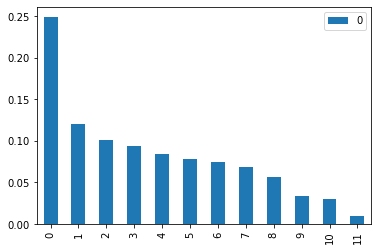

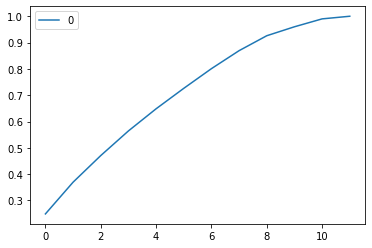

In [183]:
#试图画出pareto图来解释不能进行降维
plt.figure()
pd.DataFrame(var).plot(kind = 'bar')
pd.DataFrame(var.cumsum()/var.sum()).plot()
plt.show()

In [ ]:
########################################################第二题##########################################################
##################################按艺术家的作品数加权，作对艺术家数据的标准化###############################

In [185]:
#读取artist数据：
df_art = pd.read_csv('data_by_artist.csv')

In [186]:
df_art.head()

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count
0,Frank Sinatra,792507,0.384478,0.238017,0.364288,110.181698,-14.271141,1,5,0.735648,0.020855,0.232106,0.049614,189179.9255,26.004383,1369
1,Vladimir Horowitz,119107,0.343210,0.118844,0.225951,94.900679,-23.193418,1,1,0.990070,0.879508,0.183812,0.043360,266541.1251,3.592378,1207
2,Johnny Cash,816890,0.619803,0.449381,0.680662,115.037747,-11.593104,1,10,0.685637,0.022647,0.242243,0.098216,162279.2672,26.614130,1104
3,Billie Holiday,79016,0.572637,0.201368,0.498934,109.912172,-13.225966,1,5,0.908499,0.013064,0.217727,0.062432,185131.4530,15.621005,1095
4,Bob Dylan,66915,0.512598,0.477932,0.551934,126.160149,-11.184330,1,7,0.562567,0.034211,0.308978,0.064535,256713.4203,30.860806,1092


In [187]:
#加权平均的尝试：
(df_art['danceability'] * df_art['count']).sum()/df_art['count'].sum()

0.5281758817104306

In [188]:
(df_art['energy'] * df_art['count']).sum()/df_art['count'].sum()

0.5365691335691455

In [189]:
(df_art['valence'] * df_art['count']).sum()/df_art['count'].sum()

0.5352128549426667

In [190]:
((df_art['valence'] -0.5352128549426667)**2  * df_art['count']).sum()/df_art['count'].sum()

0.024467114172207555

In [193]:
import math
#定义一个函数，将某一列按照count进行加权标准化,输入数据集，想要标准化的列column，以及权重列weight（str格式）
def standard(df, column, weight):
    mean = (df[column] * df[weight]).sum()/df[weight].sum()
    std = math.sqrt( ((df[column] - mean)**2  * df[weight]).sum()/df[weight].sum() )
    df[column] = (df[column]-mean)/std

In [194]:
columns_need = ['danceability','energy','valence','tempo','loudness','mode','key','acousticness','instrumentalness','liveness','speechiness']

In [195]:
for column in columns_need:
    standard(df_art,column,'count')

In [196]:
df_art.head(10)

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count
0,Frank Sinatra,792507,-1.308405,-1.454264,-1.092731,-0.805091,-0.894852,0.324377,0.028394,1.118586,-0.521609,0.352978,-0.274802,189179.9255,26.004383,1369
1,Vladimir Horowitz,119107,-1.684170,-2.034758,-1.977130,-2.186117,-3.159173,0.324377,-1.080872,2.002981,3.752145,-0.318028,-0.401035,266541.1251,3.592378,1207
2,Johnny Cash,816890,0.834295,-0.424697,0.929867,-0.366225,-0.215212,0.324377,1.414976,0.944742,-0.512691,0.493827,0.706122,162279.2672,26.614130,1104
3,Billie Holiday,79016,0.404827,-1.632781,-0.231930,-0.829450,-0.629605,0.324377,0.028394,1.719430,-0.560388,0.153193,-0.016108,185131.4530,15.621005,1095
4,Bob Dylan,66915,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339,256713.4203,30.860806,1092
5,The Rolling Stones,894465,-0.033958,0.893087,0.767927,0.422477,0.739732,0.324377,-1.358188,-0.417361,0.251273,0.857871,-0.237955,229705.9623,34.573913,1035
6,The Beach Boys,41874,-0.229737,-0.021619,0.631274,0.623772,0.207935,0.324377,1.137660,-0.053414,-0.051216,-0.215531,-0.388707,148845.0946,27.957746,994
7,Elvis Presley,180228,-0.294396,-0.537089,0.550037,-0.686903,-0.545289,0.324377,-1.358188,1.138621,-0.358513,0.564733,-0.099933,156211.0354,33.391919,990
8,Wolfgang Amadeus Mozart,26350,-1.591872,-1.942086,-1.308556,-0.947645,-2.392962,0.324377,0.583027,1.903920,1.907431,-0.248341,0.106061,329702.9243,8.936034,938
9,Miles Davis,423829,-0.618752,-1.112258,-0.750242,-0.500646,-0.959688,-3.082833,-1.358188,0.840716,0.395296,0.181467,-0.174760,404023.4456,22.700231,864


In [201]:
df_art.set_index(['artist_id'], inplace=True)

In [202]:
df_art.head()

,artist_name,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count
artist_id,,,,,,,,,,,,,,,
792507,Frank Sinatra,-1.308405,-1.454264,-1.092731,-0.805091,-0.894852,0.324377,0.028394,1.118586,-0.521609,0.352978,-0.274802,189179.9255,26.004383,1369
119107,Vladimir Horowitz,-1.684170,-2.034758,-1.977130,-2.186117,-3.159173,0.324377,-1.080872,2.002981,3.752145,-0.318028,-0.401035,266541.1251,3.592378,1207
816890,Johnny Cash,0.834295,-0.424697,0.929867,-0.366225,-0.215212,0.324377,1.414976,0.944742,-0.512691,0.493827,0.706122,162279.2672,26.614130,1104
79016,Billie Holiday,0.404827,-1.632781,-0.231930,-0.829450,-0.629605,0.324377,0.028394,1.719430,-0.560388,0.153193,-0.016108,185131.4530,15.621005,1095
66915,Bob Dylan,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339,256713.4203,30.860806,1092


In [203]:
df_art_vector =  df_art.drop(columns = ['artist_name','duration_ms','popularity','count'])

In [204]:
df_art_vector.head()

,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness
artist_id,,,,,,,,,,,
792507,-1.308405,-1.454264,-1.092731,-0.805091,-0.894852,0.324377,0.028394,1.118586,-0.521609,0.352978,-0.274802
119107,-1.684170,-2.034758,-1.977130,-2.186117,-3.159173,0.324377,-1.080872,2.002981,3.752145,-0.318028,-0.401035
816890,0.834295,-0.424697,0.929867,-0.366225,-0.215212,0.324377,1.414976,0.944742,-0.512691,0.493827,0.706122
79016,0.404827,-1.632781,-0.231930,-0.829450,-0.629605,0.324377,0.028394,1.719430,-0.560388,0.153193,-0.016108
66915,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339


In [207]:
df_art_vector[:10].T.corr()

artist_id,792507,119107,816890,79016,66915,894465,41874,180228,26350,423829
artist_id,,,,,,,,,,
792507,1.000000,0.582964,0.404504,0.760826,0.602901,-0.429443,-0.027551,0.498038,0.760910,0.163792
119107,0.582964,1.000000,-0.019110,0.434924,-0.044639,-0.266003,-0.301920,0.369363,0.917576,0.384421
816890,0.404504,-0.019110,1.000000,0.685343,0.362497,-0.647464,0.230144,0.214505,0.228084,-0.005086
79016,0.760826,0.434924,0.685343,1.000000,0.377117,-0.494852,-0.147164,0.617020,0.564627,0.241369
66915,0.602901,-0.044639,0.362497,0.377117,1.000000,-0.085610,0.186812,0.278765,0.176556,0.094954
894465,-0.429443,-0.266003,-0.647464,-0.494852,-0.085610,1.000000,-0.325862,0.293265,-0.540484,-0.034334
41874,-0.027551,-0.301920,0.230144,-0.147164,0.186812,-0.325862,1.000000,-0.443275,-0.041784,-0.438613
180228,0.498038,0.369363,0.214505,0.617020,0.278765,0.293265,-0.443275,1.000000,0.288024,0.292608
26350,0.760910,0.917576,0.228084,0.564627,0.176556,-0.540484,-0.041784,0.288024,1.000000,0.330835


In [208]:
df_art_vector[:10].T.corr('spearman')

artist_id,792507,119107,816890,79016,66915,894465,41874,180228,26350,423829
artist_id,,,,,,,,,,
792507,1.000000,0.700000,0.345455,0.600000,0.636364,-0.436364,-0.109091,0.445455,0.745455,0.336364
119107,0.700000,1.000000,0.136364,0.609091,0.036364,-0.445455,-0.354545,0.554545,0.872727,0.454545
816890,0.345455,0.136364,1.000000,0.681818,0.436364,-0.554545,0.072727,0.309091,0.200000,-0.027273
79016,0.600000,0.609091,0.681818,1.000000,0.309091,-0.554545,-0.345455,0.618182,0.436364,0.200000
66915,0.636364,0.036364,0.436364,0.309091,1.000000,-0.081818,0.272727,0.172727,0.218182,0.054545
894465,-0.436364,-0.445455,-0.554545,-0.554545,-0.081818,1.000000,0.109091,0.072727,-0.636364,-0.172727
41874,-0.109091,-0.354545,0.072727,-0.345455,0.272727,0.109091,1.000000,-0.454545,-0.027273,-0.600000
180228,0.445455,0.554545,0.309091,0.618182,0.172727,0.072727,-0.454545,1.000000,0.236364,0.454545
26350,0.745455,0.872727,0.200000,0.436364,0.218182,-0.636364,-0.027273,0.236364,1.000000,0.390909


In [209]:
df_art_vector[:10].T.corr()-df_art_vector[:10].T.corr('spearman')

artist_id,792507,119107,816890,79016,66915,894465,41874,180228,26350,423829
artist_id,,,,,,,,,,
792507,0.000000,-0.117036,0.059049,0.160826,-0.033463,0.006921,0.081540,0.052583,0.015456,-0.172572
119107,-0.117036,0.000000,-0.155474,-0.174167,-0.081003,0.179452,0.052625,-0.185183,0.044849,-0.070124
816890,0.059049,-0.155474,0.000000,0.003525,-0.073867,-0.092919,0.157417,-0.094586,0.028084,0.022186
79016,0.160826,-0.174167,0.003525,0.000000,0.068026,0.059694,0.198290,-0.001162,0.128263,0.041369
66915,-0.033463,-0.081003,-0.073867,0.068026,0.000000,-0.003792,-0.085915,0.106038,-0.041626,0.040409
894465,0.006921,0.179452,-0.092919,0.059694,-0.003792,0.000000,-0.434953,0.220538,0.095879,0.138394
41874,0.081540,0.052625,0.157417,0.198290,-0.085915,-0.434953,0.000000,0.011271,-0.014511,0.161387
180228,0.052583,-0.185183,-0.094586,-0.001162,0.106038,0.220538,0.011271,0.000000,0.051661,-0.161938
26350,0.015456,0.044849,0.028084,0.128263,-0.041626,0.095879,-0.014511,0.051661,0.000000,-0.060074


In [211]:
df_art_vector[:10].T.corr('kendall') - df_art_vector[:10].T.corr()

artist_id,792507,119107,816890,79016,66915,894465,41874,180228,26350,423829
artist_id,,,,,,,,,,
792507,0.000000,-0.092055,-0.168140,-0.233553,-0.111992,0.047624,-0.063358,-0.152583,-0.197274,0.108936
119107,-0.092055,0.000000,0.037292,0.019621,0.099185,-0.043088,0.138284,0.048819,-0.208485,-0.038967
816890,-0.168140,0.037292,0.000000,-0.194434,0.019321,0.229283,-0.139235,0.021859,-0.064448,-0.049459
79016,-0.233553,0.019621,-0.194434,0.000000,-0.140753,0.076670,-0.052836,-0.162474,-0.255536,-0.077732
66915,-0.111992,0.099185,0.019321,-0.140753,0.000000,-0.005299,0.013188,-0.078765,0.023444,-0.040409
894465,0.047624,-0.043088,0.229283,0.076670,-0.005299,0.000000,0.453135,-0.238720,0.085939,-0.129303
41874,-0.063358,0.138284,-0.139235,-0.052836,0.013188,0.453135,0.000000,0.061456,0.023602,0.056795
180228,-0.152583,0.048819,0.021859,-0.162474,-0.078765,-0.238720,0.061456,0.000000,-0.088024,0.052847
26350,-0.197274,-0.208485,-0.064448,-0.255536,0.023444,0.085939,0.023602,-0.088024,0.000000,0.014620


In [212]:
from sklearn.metrics.pairwise import cosine_similarity

In [213]:
#各个行之间的余弦相似度：
cosine_similarity(df_art_vector[:5])

array([[ 1.        ,  0.63280763,  0.06376684,  0.73013577,  0.2796107 ],
       [ 0.63280763,  1.        , -0.17061531,  0.45307813, -0.16712581],
       [ 0.06376684, -0.17061531,  1.        ,  0.51089849,  0.49911967],
       [ 0.73013577,  0.45307813,  0.51089849,  1.        ,  0.27817332],
       [ 0.2796107 , -0.16712581,  0.49911967,  0.27817332,  1.        ]])

In [ ]:
####################决定采用余弦相似度###################

In [244]:
#同一个流派内部（pop/rock）：
cosine_similarity(df_art_vector.loc[[151787,441,1098,5441,5501,5882],:])

array([[1.        , 0.3641976 , 0.74139157, 0.61658889, 0.61543154,
        0.26855465],
       [0.3641976 , 1.        , 0.52936086, 0.53315509, 0.49765887,
        0.38904557],
       [0.74139157, 0.52936086, 1.        , 0.7176821 , 0.86986063,
        0.51174071],
       [0.61658889, 0.53315509, 0.7176821 , 1.        , 0.71242359,
        0.23998504],
       [0.61543154, 0.49765887, 0.86986063, 0.71242359, 1.        ,
        0.65889109],
       [0.26855465, 0.38904557, 0.51174071, 0.23998504, 0.65889109,
        1.        ]])

In [224]:
#不同流派内部：pop/rock,blues,vocal,classical,comedy/spoken,electronic
cosine_similarity(df_art_vector.loc[[335,28166,6334,37658,12654,2411],:])

array([[ 1.        , -0.2980512 ,  0.17796565,  0.07687993, -0.48528438,
         0.09441318],
       [-0.2980512 ,  1.        , -0.36643824, -0.02427066,  0.22448019,
        -0.1225151 ],
       [ 0.17796565, -0.36643824,  1.        ,  0.27301423, -0.44674861,
         0.34895623],
       [ 0.07687993, -0.02427066,  0.27301423,  1.        , -0.44202608,
         0.49516971],
       [-0.48528438,  0.22448019, -0.44674861, -0.44202608,  1.        ,
        -0.52682165],
       [ 0.09441318, -0.1225151 ,  0.34895623,  0.49516971, -0.52682165,
         1.        ]])

In [233]:
DG.nodes[2411]['genre']

'Electronic'

In [241]:

####################################################第三问#####################################################

#制作艺术家和流派的索引集：
people_genre = {}
for node in DG.nodes:
    people_genre[node] = DG.nodes[node]['genre']

In [242]:
people_genre = pd.DataFrame.from_dict(people_genre,orient='index')
people_genre.columns = ['genre']

In [243]:
people_genre

,genre
759491,Pop/Rock
74,Pop/Rock
25462,Electronic
335,Pop/Rock
66915,Pop/Rock
...,...
3661738,Pop/Rock
261309,Reggae
3670556,R&B;
2518003,Reggae


In [246]:
df_art_vector = people_genre.join(df_art_vector)

In [247]:
#df_art_vector.head()

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness
759491,Pop/Rock,-1.515680,1.573360,-0.741129,1.499143,0.861288,0.324377,0.583027,-1.310069,-0.605288,0.584144,1.795095
74,Pop/Rock,0.453663,1.599803,-0.308228,-0.178583,0.934704,0.324377,1.137660,-1.346828,-0.616202,2.199470,-0.347748
25462,Electronic,0.896786,0.459166,0.135024,-1.269126,-0.035169,0.324377,-1.358188,-0.658080,0.295232,-0.587057,1.349294
335,Pop/Rock,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862
66915,Pop/Rock,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339


In [248]:
#df_art_vector_grouped = df_art_vector.groupby(by = ['genre'])

In [249]:
#df_vector_poprock = df_art_vector_grouped.get_group('Pop/Rock')

In [251]:
df_vector_poprock.head()

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness
759491,Pop/Rock,-1.515680,1.573360,-0.741129,1.499143,0.861288,0.324377,0.583027,-1.310069,-0.605288,0.584144,1.795095
74,Pop/Rock,0.453663,1.599803,-0.308228,-0.178583,0.934704,0.324377,1.137660,-1.346828,-0.616202,2.199470,-0.347748
335,Pop/Rock,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862
66915,Pop/Rock,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339
71209,Pop/Rock,-0.230606,-1.382220,-1.254926,-0.224919,-1.294267,0.324377,1.137660,1.098066,-0.489377,-0.800165,-0.493479


In [252]:
#发现之前多drop了count，再用旧的加回来
df_art_vector =  df_art.drop(columns = ['artist_name','duration_ms','popularity'])
df_art_vector = people_genre.join(df_art_vector)
df_art_vector_grouped = df_art_vector.groupby(by = ['genre'])
df_vector_poprock = df_art_vector_grouped.get_group('Pop/Rock')

In [253]:
df_vector_poprock.head()

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,count
759491,Pop/Rock,-1.515680,1.573360,-0.741129,1.499143,0.861288,0.324377,0.583027,-1.310069,-0.605288,0.584144,1.795095,14.0
74,Pop/Rock,0.453663,1.599803,-0.308228,-0.178583,0.934704,0.324377,1.137660,-1.346828,-0.616202,2.199470,-0.347748,2.0
335,Pop/Rock,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862,33.0
66915,Pop/Rock,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339,1092.0
71209,Pop/Rock,-0.230606,-1.382220,-1.254926,-0.224919,-1.294267,0.324377,1.137660,1.098066,-0.489377,-0.800165,-0.493479,146.0


In [255]:
#建立所有的流派集：
genres_set = set()
for node in DG.nodes:
    genres_set.add(DG.nodes[node]['genre'])

In [258]:
genres_list = list(genres_set)

In [261]:
#计算流派的音乐特色向量，按流派内的歌手作品数加权,得到流派对应的音乐特征向量字典：
genre_music = {}
for genre in genres_list:
    df_vector_genre = df_art_vector_grouped.get_group(genre)
    genre_vector = []
    for column in columns_need:
        mean = (df_vector_genre[column] * df_vector_genre['count']).sum()/df_vector_genre['count'].sum()
        genre_vector.append(mean)
    genre_music[genre] = genre_vector

In [264]:
genre_music = pd.DataFrame(genre_music)

In [ ]:
#genre_music.head()

In [267]:
#得到各个流派的音乐特点向量dataframe
genre_music = genre_music.T
genre_music.columns = ['danceability','energy','valence','tempo','loudness','mode', \
                       'key','acousticness','instrumentalness','liveness','speechiness']

In [268]:
genre_music.head()

,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness
Avant-Garde,-0.072377,-1.337016,-0.528730,-0.575967,-1.257527,0.239374,0.289567,1.189117,0.447728,-0.566223,-0.123118
Country,0.500868,-0.225833,0.396067,0.050382,-0.004614,0.319483,0.274488,0.214315,-0.432012,-0.261849,-0.347193
Easy Listening,-0.808890,-0.933818,-0.788350,-0.701964,-0.923116,0.233112,-0.265264,1.036628,2.011646,-0.477688,-0.320875
Pop/Rock,-0.166688,0.535008,-0.016956,0.376248,0.386665,0.136231,0.055458,-0.552302,-0.166489,0.146354,-0.082107
R&B;,0.854106,0.045450,0.470835,-0.215098,0.241278,-0.482380,-0.064784,-0.213138,-0.451107,-0.201333,0.224317


In [270]:
#算出各个流派的余弦相似度，并保存
cosine_similarity_genre = cosine_similarity(genre_music)

In [272]:
np.savetxt("cosine_similarity_genre.csv", cosine_similarity_genre, delimiter=',')

In [273]:
genres_list

['Avant-Garde',
 'Country',
 'Easy Listening',
 'Pop/Rock',
 'R&B;',
 'Folk',
 'New Age',
 'International',
 'Blues',
 'Classical',
 'Jazz',
 'Comedy/Spoken',
 'Unknown',
 'Stage & Screen',
 'Electronic',
 'Religious',
 'Vocal',
 'Reggae',
 "Children's",
 'Latin']

In [293]:
#建立流派间影响矩阵的初始化，接下来为其循环赋值：
influence_genres = pd.DataFrame(np.zeros((20,20)),index = genres_list, columns = genres_list)

In [292]:
influence_genres.loc['Folk','R&B;']

0.0

In [295]:
#计算每个entry上累计的数目
for (u,v) in DG.edges:
    influence_genres.loc[DG.nodes[u]['genre'],DG.nodes[v]['genre']] += 1

In [296]:
influence_genres

,Avant-Garde,Country,Easy Listening,Pop/Rock,R&B;,Folk,New Age,International,Blues,Classical,Jazz,Comedy/Spoken,Unknown,Stage & Screen,Electronic,Religious,Vocal,Reggae,Children's,Latin
Avant-Garde,7.0,0.0,0.0,42.0,0.0,0.0,7.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0
Country,0.0,2502.0,0.0,641.0,7.0,101.0,4.0,3.0,10.0,0.0,11.0,1.0,3.0,0.0,2.0,6.0,7.0,1.0,0.0,2.0
Easy Listening,1.0,0.0,18.0,31.0,0.0,0.0,5.0,1.0,0.0,0.0,8.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,3.0
Pop/Rock,11.0,519.0,9.0,22049.0,284.0,166.0,37.0,37.0,47.0,25.0,95.0,30.0,4.0,10.0,504.0,83.0,75.0,24.0,0.0,132.0
R&B;,2.0,39.0,0.0,1625.0,3384.0,6.0,1.0,11.0,50.0,2.0,71.0,4.0,0.0,0.0,88.0,74.0,38.0,104.0,0.0,31.0
Folk,0.0,108.0,0.0,553.0,8.0,271.0,17.0,29.0,3.0,1.0,1.0,5.0,0.0,0.0,3.0,7.0,3.0,0.0,0.0,1.0
New Age,0.0,0.0,1.0,18.0,0.0,2.0,47.0,2.0,0.0,3.0,5.0,0.0,0.0,2.0,10.0,0.0,3.0,0.0,0.0,1.0
International,2.0,0.0,2.0,116.0,12.0,11.0,12.0,81.0,1.0,5.0,20.0,0.0,2.0,0.0,5.0,1.0,10.0,11.0,0.0,37.0
Blues,0.0,6.0,0.0,689.0,118.0,24.0,1.0,5.0,372.0,0.0,17.0,0.0,0.0,0.0,1.0,1.0,5.0,3.0,0.0,1.0
Classical,11.0,2.0,1.0,43.0,0.0,0.0,4.0,2.0,0.0,17.0,2.0,0.0,0.0,5.0,16.0,0.0,10.0,0.0,0.0,1.0


In [297]:
#将结果导出：
influence_genres.to_csv('influence_genres.csv')

In [299]:
df_art_vector.head()

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,count
759491,Pop/Rock,-1.515680,1.573360,-0.741129,1.499143,0.861288,0.324377,0.583027,-1.310069,-0.605288,0.584144,1.795095,14.0
74,Pop/Rock,0.453663,1.599803,-0.308228,-0.178583,0.934704,0.324377,1.137660,-1.346828,-0.616202,2.199470,-0.347748,2.0
25462,Electronic,0.896786,0.459166,0.135024,-1.269126,-0.035169,0.324377,-1.358188,-0.658080,0.295232,-0.587057,1.349294,12.0
335,Pop/Rock,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862,33.0
66915,Pop/Rock,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339,1092.0


In [350]:
###########################一下试图训练一个简单的分类器，距离流派特征最近的即归为该类#######################
df_art_vector = df_art_vector.dropna()
###########除去那个空行###########

In [354]:
from sklearn.metrics.pairwise import cosine_similarity
success = 0
fail = 0
for index,row in df_art_vector.iterrows():
    s = []
    for index1,row1 in genre_music.iterrows():
        #利用余弦相似度度：
        #s.append(cosine_similarity([np.array(row[1:12])], [np.array(row1[0:11])]))
        #利用欧氏距离：
        s.append(np.linalg.norm(np.array(row[1:12]) - np.array(row1[0:11])))
    max_index = s.index(max(s))# 最大值的索引
        
    if genres_list[max_index] == index:
        success += 1
    else:
        fail += 1

In [311]:
#s = np.zeros([20])

In [312]:
#s[1]

0.0

In [320]:
#mylist = list([1,2,3])

In [321]:
#mylist.index(max(mylist))

2

In [355]:
print(success,fail)

0 5602


In [329]:
#df_art_vector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5603 entries, 759491 to 2896351
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             5603 non-null   object 
 1   danceability      5602 non-null   float64
 2   energy            5602 non-null   float64
 3   valence           5602 non-null   float64
 4   tempo             5602 non-null   float64
 5   loudness          5602 non-null   float64
 6   mode              5602 non-null   float64
 7   key               5602 non-null   float64
 8   acousticness      5602 non-null   float64
 9   instrumentalness  5602 non-null   float64
 10  liveness          5602 non-null   float64
 11  speechiness       5602 non-null   float64
 12  count             5602 non-null   float64
dtypes: float64(12), object(1)
memory usage: 772.8+ KB


In [332]:
#df_art_vector.dropna()

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,count
759491,Pop/Rock,-1.515680,1.573360,-0.741129,1.499143,0.861288,0.324377,0.583027,-1.310069,-0.605288,0.584144,1.795095,14.0
74,Pop/Rock,0.453663,1.599803,-0.308228,-0.178583,0.934704,0.324377,1.137660,-1.346828,-0.616202,2.199470,-0.347748,2.0
25462,Electronic,0.896786,0.459166,0.135024,-1.269126,-0.035169,0.324377,-1.358188,-0.658080,0.295232,-0.587057,1.349294,12.0
335,Pop/Rock,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862,33.0
66915,Pop/Rock,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339,1092.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661738,Pop/Rock,-0.338497,-0.636009,-1.637984,1.894354,-0.650677,0.324377,0.028394,1.411801,0.594023,-1.176875,-0.715076,2.0
261309,Reggae,2.801004,1.252010,-0.782592,-0.784422,1.230513,0.324377,0.583027,-1.178821,0.270532,-1.604824,3.773591,5.0
3670556,R&B;,2.083508,1.132182,1.526580,0.455400,1.130371,-3.082833,0.028394,0.362020,-0.625410,1.768743,0.725980,2.0
2518003,Reggae,-0.169399,0.776596,-0.011407,-1.563519,0.952179,-3.082833,0.305710,-0.884904,-0.625410,1.647663,3.034322,7.0


In [333]:
#df_art_vector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5603 entries, 759491 to 2896351
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             5603 non-null   object 
 1   danceability      5602 non-null   float64
 2   energy            5602 non-null   float64
 3   valence           5602 non-null   float64
 4   tempo             5602 non-null   float64
 5   loudness          5602 non-null   float64
 6   mode              5602 non-null   float64
 7   key               5602 non-null   float64
 8   acousticness      5602 non-null   float64
 9   instrumentalness  5602 non-null   float64
 10  liveness          5602 non-null   float64
 11  speechiness       5602 non-null   float64
 12  count             5602 non-null   float64
dtypes: float64(12), object(1)
memory usage: 772.8+ KB


In [347]:
#pd.isnull(df_art_vector)['energy'].value_counts()

False    5602
True        1
Name: energy, dtype: int64

In [348]:
#df_art_vector.to_csv('df_art_vector.csv')

In [418]:
#################### KNN #######################
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [363]:
#将class变为数字索引：
df = df_art_vector
df['genre'] = df['genre'].map({'Avant-Garde':0,
 'Country':1,
 'Easy Listening':2,
 'Pop/Rock':3,
 'R&B;':4,
 'Folk':5,
 'New Age':6,
 'International':7,
 'Blues':8,
 'Classical':9,
 'Jazz':10,
 'Comedy/Spoken':11,
 'Unknown':12,
 'Stage & Screen':13,
 'Electronic':14,
 'Religious':15,
 'Vocal':16,
 'Reggae':17,
 "Children's":18,
 'Latin':19}).astype(int)

<ipython-input-363-ebe6e21996fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['genre'].map({'Avant-Garde':0,


In [364]:
df.head()

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,count
759491,3,-1.515680,1.573360,-0.741129,1.499143,0.861288,0.324377,0.583027,-1.310069,-0.605288,0.584144,1.795095,14.0
74,3,0.453663,1.599803,-0.308228,-0.178583,0.934704,0.324377,1.137660,-1.346828,-0.616202,2.199470,-0.347748,2.0
25462,14,0.896786,0.459166,0.135024,-1.269126,-0.035169,0.324377,-1.358188,-0.658080,0.295232,-0.587057,1.349294,12.0
335,3,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862,33.0
66915,3,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339,1092.0


In [366]:
#分开features和class：
x_data = df.drop(['genre','count'],axis=1)
y_data = df['genre']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['danceability', 'energy', 'valence', 'tempo', 'loudness',
       'mode', 'key', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness'])
df.head()

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,count
759491,3,-1.515680,1.573360,-0.741129,1.499143,0.861288,0.324377,0.583027,-1.310069,-0.605288,0.584144,1.795095,14.0
74,3,0.453663,1.599803,-0.308228,-0.178583,0.934704,0.324377,1.137660,-1.346828,-0.616202,2.199470,-0.347748,2.0
25462,14,0.896786,0.459166,0.135024,-1.269126,-0.035169,0.324377,-1.358188,-0.658080,0.295232,-0.587057,1.349294,12.0
335,3,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862,33.0
66915,3,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339,1092.0


In [419]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.1, random_state = 1)
knn_clf=KNeighborsClassifier(n_neighbors = 13 , weights = 'distance',algorithm = 'kd_tree' , p = 1)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [420]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[  0   0   0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0]
 [  0  12   0  21   7   0   0   0   0   0   2   0   0   0   0   3   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   6   0 255  13   0   1   0   0   0   4   0   2   1   0   2   1   0]
 [  0   1   0  28  30   0   0   0   0   0   1   0   0   0   0   1   0   1]
 [  0   0   0   4   0   0   0   0   0   0   1   0   0   0   0   3   0   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   4   1   0   0   0   0   0   1   0   0   0   0   2   0   0]
 [  0   2   0   4   2   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   1   0   0   1   0   0   0   0   0   1   0   0]
 [  0   2   0   6   2   0   1   0   0   0  24   0   1   0   0   1   0   0]
 [  0   0   0   1   1   1   0   0   0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   2   0   0]
 [  0  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [409]:
def para(size,n,p):
    X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size = size , random_state = 1)
    knn_clf=KNeighborsClassifier(n_neighbors = n , weights = 'distance',algorithm = 'kd_tree' , p = p)
    knn_clf.fit(X_train,y_train)
    ypred=knn_clf.predict(X_test) #These are the predicted output values
    result = confusion_matrix(y_test, ypred)
#print('Confusion Matrix:')
#print(result)
#result1 = classification_report(y_test, ypred)
#print('Classification Report:',)
#print (result1)
    result2 = accuracy_score(y_test,ypred)
#print('Accuracy:',result2)
    return result2

In [417]:
for size in range(1,4):
    for n in range(4,16):
        for p in range(1,4):
            t = para(size/10,n,p)
            #if t >= 0.75:
            print([size,n,p],t)

[1, 4, 1] 0.5828877005347594
[1, 4, 2] 0.5561497326203209
[1, 4, 3] 0.5418894830659536
[1, 5, 1] 0.5846702317290553
[1, 5, 2] 0.5543672014260249
[1, 5, 3] 0.5401069518716578
[1, 6, 1] 0.5757575757575758
[1, 6, 2] 0.5454545454545454
[1, 6, 3] 0.5347593582887701
[1, 7, 1] 0.5882352941176471
[1, 7, 2] 0.5650623885918004
[1, 7, 3] 0.5276292335115864
[1, 8, 1] 0.5900178253119429
[1, 8, 2] 0.5721925133689839
[1, 8, 3] 0.5490196078431373
[1, 9, 1] 0.5989304812834224
[1, 9, 2] 0.5864527629233511
[1, 9, 3] 0.5739750445632799
[1, 10, 1] 0.6007130124777184
[1, 10, 2] 0.5757575757575758
[1, 10, 3] 0.5757575757575758
[1, 11, 1] 0.6096256684491979
[1, 11, 2] 0.5828877005347594
[1, 11, 3] 0.5757575757575758
[1, 12, 1] 0.6096256684491979
[1, 12, 2] 0.5704099821746881
[1, 12, 3] 0.5900178253119429
[1, 13, 1] 0.6131907308377896
[1, 13, 2] 0.5828877005347594
[1, 13, 3] 0.5811051693404634
[1, 14, 1] 0.6078431372549019
[1, 14, 2] 0.5882352941176471
[1, 14, 3] 0.5828877005347594
[1, 15, 1] 0.606060606060606

In [406]:
##################最优参数：1，13，1###########

range(1, 10)

In [422]:
#保存需要的数据：
df_art_vector.to_csv('df_art_vector.csv')
genre_music.to_csv('genre_music.csv')
people_genre.to_csv('people_genre.csv')